### Naloga

Naloga prihaja s tekmovanja Bober 2014/15. Otroci, ki jim je namenjena, so jo reševali ročno, ne z računalnikom.

--------------

Kolona strumnih bobrov koraka po poti, na kateri so zajci skopali nekaj lukenj. Tule, recimo, so prišli do luknje globine 3.

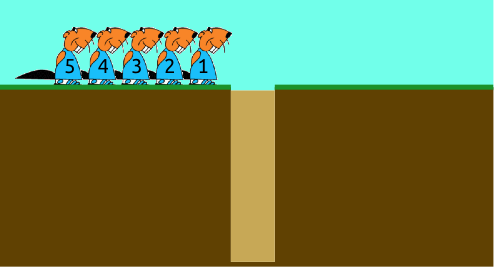

Ker bobri niso ravno skakalci in luknje ne morejo preskočiti, se znajdejo takole: prvi bober skoči v luknjo, drugi nanj in tako naprej, dokler ni luknja polna.

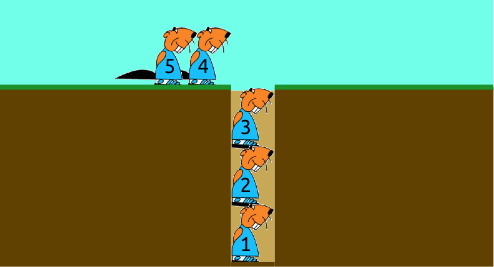


Ostali bobri prečkajo luknjo.

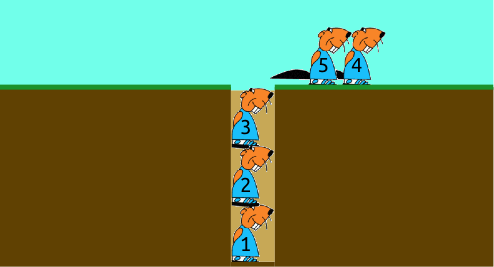

Ko so na drugi strani, se vsi bobri primejo za repe in tako izvlečejo tiste, ki so v luknji.

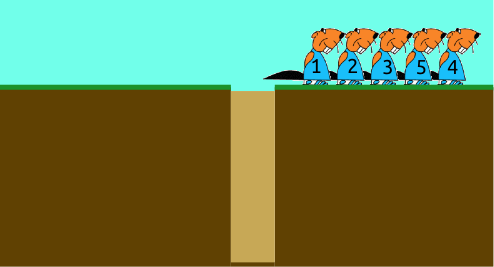

Vrstni red bobrov se je pri tem očitno spremenil.

Lukenj je lahko seveda več. In tudi bobrov ni vedno pet. Razdalje med luknjami pa so dovolj velike, da bobri nikoli ne prečkajo dveh lukenj hkrati.

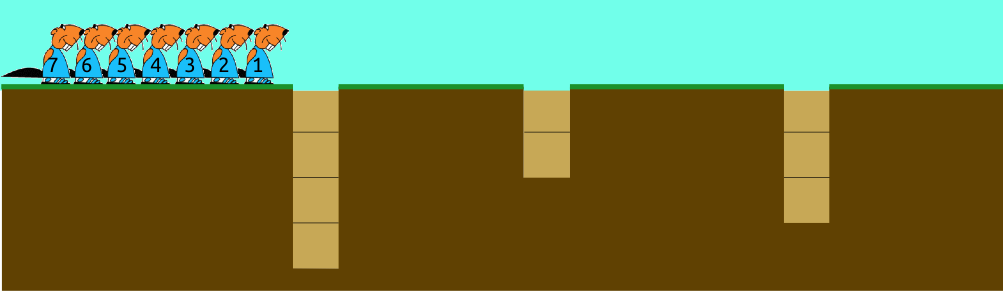

Bobre bomo opisovali z nizi - po en znak za Bobra. V gornjem primeru gredo v luknje v vrstnem redu  `"54321"`; številke (ali črke) so napisane od leve proti desni, tako da gre v luknjo najprej tisti bober, ki je na najbolj desnem mestu v nizu. Iz luknje prilezejo v vrstnem redu `"12354"`.

V kakšnem redu je sedem bobrov, ko prečkajo vse tri luknje na spodnji sliki, razmisli sam(a). Tudi otroci so morali.

### Ogrevalna naloga

Na začetek programa napiši

In [1]:
bobri = "54321"
globina = 3
# Tu bo potrebno dodati eno vrstico
print(bobri)

54321


Dodaj vrstico, ki spremeni bobre v spremenljivki `bobri` tako, kot se spremeni vrstni red, ko gredo čez globino luknje `globina`. Pri tem si bo potrebno seveda pomagati z indeksi in/ali rezinami (od spredaj, zadaj, negativnimi, pozitivnimi ... bogve kakšnimi. :)) Izpisani rezultat mora biti seveda `"12354"`.

**Ne rešuj ((zgolj)) s poskušanjem.** Poanta je v tem, da veš kaj delaš. In da takrat, ko ne deluje prav, razumeš, zakaj ne. Če samo slepo poskušaš, se učiš samo slepo poskušati.

Zdaj pa preveri ali program deluje pravilno. Če imamo

In [2]:
bobri = "ABCDEFGHI"
globina = 3
# Enaka vrstica, kot si jo dodal(a) prejle
print(bobri)

ABCDEFGHI


mora izpisati `"IHGABCDEF"`.

Če pa imamo `bobri = "ABCDEFGHI"` in `globina = 1`, dobimo `"IABCDEFGH"`.

Če imamo `bobri="12345"` in `globina = 2`, dobimo `"54123"`.


### Obvezna naloga

Zdaj pa imamo niz z bobri in seznam globin lukenj.

In [3]:
bobri = "54321"
luknje = [4, 2, 3]

# tu pride tvoj program

print(bobri)

54321


Program mora izpisati vrstni red podanih bobrov, ko pridejo čez podane luknje. Seveda mora delovati za poljubno število bobrov in lukenj, ne le za ta konkretni primer. Predpostaviti pa smeš, da luknje niso pregloboke in da so dovolj razmaknjene, da jih bobri lahko prečkajo.


### Dodatna naloga

Spet imamo

In [4]:
bobri = "54321"
luknje = [4, 2, 3]

Kakšne luknje bi morali dodati, da bi se bobri, ko gredo prek njih, spet preuredili v prvotni vrstni red?

Nalogo lahko najprej rešiš za te konkretne bobre in luknje. Nato razmisli, kako to narediti v splošnem. Skratka, ideja je razmisliti, kako k nekemu podanemu seznamo dodati seznam lukenj, ki nevtralizira podani seznam (za podano število bobrov).

Pri dodatni nalogi (najbrž) ne bo veliko programiranja, temveč predvsem razmislek.

## Rešitev

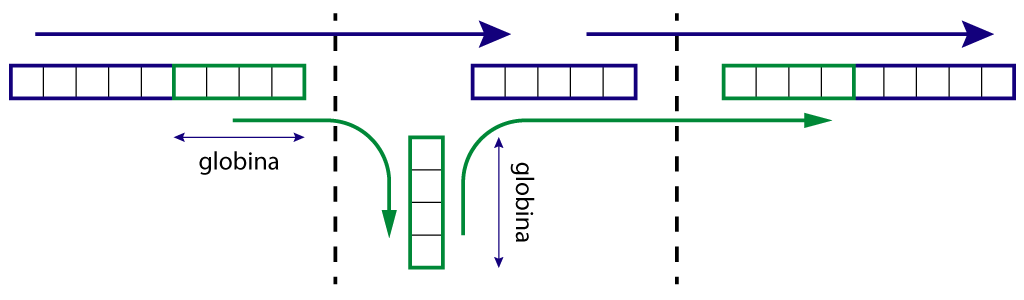

Končni seznam (desna slika) dobimo tako, da postavimo zadnjih `globina` elementov na začetek v obratnem vrstnem redu, sledijo pa vsi do zadnjih `globina` v pravem vrstnem redu.

In [5]:
bobri = "54321"
globina = 3
bobri = bobri[-globina::][::-1] + bobri[:-globina]
print(bobri)

12354


Tu bi pričakovali, da bo delalo `bobri[-globina::-1]` - vzeti hočemo od `-globina` do konca. Vendar morajo biti pri negativnih korakih (`-1`) indeksi zamenjani, torej `bobri[:-globina-1::-1]`.

In [6]:
bobri = "54321"
globina = 3
bobri = bobri[:-globina-1:-1] + bobri[:-globina]
print(bobri)

12354


Za obvezno nalogo to le še zapremo v zanko.

In [7]:
bobri = "54321"
luknje = [4, 2, 3]

for globina in luknje:
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

print(bobri)

32154


## Dodatna naloga

Razmišljamo lahko na več načinov.

### Nevtralizacija posamičnih lukenj

<iframe style="float: right" width="560" height="315" src="https://www.youtube.com/embed/3CH1TGmvNpQ" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> Če imamo, recimo, 8 bobrov in luknjo globine 3, se znajde na začetku zadnjih 5 bobrov, za njimi so prvi 3 v obratnem vrstnem redu. Radi bi obrnili one 3 ... vendar lahko obračamo samo tiste, ki so na koncu, na koncu pa je tistih 5, ki jih načelno nočemo obrniti. Zato naredimo tako: najprej postavimo luknjo globine 5. Tako jih gre 5 na konec in pridejo tisti 3, ki jih želimo v resnici obrniti, na začetek. Potem luknja globine 3, da obrnemo te 3. Nato luknja globine 5, da gre teh 5 nazaj na konec in se pri tem še obrnejo v prvotni vrstni red.

V splošnem, če imamo `n` bobrov in luknjo globina `globina`, bomo to luknjo izničili z zaporedjem lukenj `[n - globina, globina, n - globina]`. 

Če hočemo nevtralizirati serijo lukenj, pa moramo paziti še na to: najprej moramo nevtralizirati zadnjo luknjo, nato predzadnjo in tako naprej do konca (oziroma tako nazaj do začetka).

In [8]:
luknje = [4, 2, 3]

# Zgoraj so šli čez te luknje bobri "54321" in izstopili kot:
bobri = "32154"
n = len(bobri)

obratne = []
for globina in luknje[::-1]:
    obratne += [n - globina, globina, n - globina]
print(obratne)

[2, 3, 2, 3, 2, 3, 1, 4, 1]


Zdaj preverimo: če smo pravilno izračunali, `obratne` preobrnejo bobre nazaj v prvotni vrstni red.

In [9]:
for globina in obratne:
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

print(bobri)

54321


Yay.

Za nevtralizacijo `n` lukenj potrebujemo `3n` antilukenj.

### Rikverc

Lažje je, če bobre preprosto pošljemo nazaj po poti. Najprej jih obrnemo okrog, tako da jih pošljemo čez luknjo globine `n - 1` (ki kot ste gotovo opazili v obveznem delu, ravno obrne vrstni red). Nato gredo prek enakih lukenj, kot smo jih imeli v začetku, le, seveda, v obratnem vrstnem redu. Nato jih ponovno obrnemo okrog.

In [10]:
luknje = [4, 2, 3]

# Zgoraj so šli čez te luknje bobri "54321" in izstopili kot:
bobri = "32154"
n = len(bobri)

obratne = [n - 1] + luknje[::-1] + [n - 1]
print(obratne)

[4, 3, 2, 4, 4]


Preverimo, če res deluje.

In [11]:
for globina in obratne:
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

print(bobri)

54321


### Pristop zmernega optimizma

Nekaj študentov je poskusilo, kaj se zgodi, če bobre preprosto pošljejo ponovno čez enake luknje. Nič takega, še malo se premešajo. Poskusilo so še enkrat. In še enkrat. In še tolikokrat, kolikorkrat je bilo treba.

In [12]:
bobri = "54321"
luknje = [4, 2, 3]

zacetni = bobri  # Zapomnimo si začetni položaj
for globina in luknje:  # in spustimo bobre čez luknje
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

ponovitev = 0
while bobri != zacetni:  # Dokler niso spet v začetnem položaju
    for globina in luknje:  # jih pošiljamo čez ene in iste luknje
        bobri = bobri[-globina::][::-1] + bobri[:-globina]
    ponovitev += 1  # ter štejemo, kolikokrat smo to storili
    
obratne = luknje * ponovitev

Takšne primerke študentov sem izzval, da bom to rešitev sprejel, če mi dokažejo, da vedno deluje. Edini razumen odgovor, ki sem ga dobil, je, da niso uspeli najti primera, ko ne bi delovalo. :) Ampak večkrat ko smo se pogovarjali o tem, bolj me je kljuvalo, da sem včasih znal nekaj matematike, in da sem morda *jaz* tisti, ki bi moral znati to dokazati.

Saj pravzaprav znam. Samo malo drugačne razporede vzemimo, da bo lažje pokazati.

In [13]:
luknje = [4, 1, 4, 5]
bobri = "1234567"

for globina in luknje:
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

print(bobri)

6735421


Luknje `[4, 1, 4, 5]` premešajo bobre iz `1 2 3 4 5 6 7` v `6 7 3 5 4 2 1`. Taki preslikavi matematiki rečejo "permutacija" in jo, v tem primeru, zapišejo tako:

$$\left({\begin{matrix}1&2&3&4&5&6&7\\6&7&3&5&4&2&1\end{matrix}}\right).$$


**Edit**: ko sem to pripravil, mi je asistent, Tomaž Hočevar, pisal, da obstaja bistveno preprostejši dokaz od spodnjega. Bobri so v začetku v nekem razporedu. Ko gredo čez luknje, pridejo v drug razpored. Ko gredo naslednjič čez vse te luknje, pridejo v tretji razpored in tako naprej. Iz vsakega razporeda pridejo v točno enega, določenega. In obratno: v vsak razpored lahko pridejo iz točno enega in le enega. Ker je razporedov končno mnogo, se bodo prej ko slej začeli ponavljati. Pa bi bilo možno, da to ponavljanje ne bi vključevalo začetnega stanja? Ne, ni: to bi pomenilo, da se da v neko stanje (najbrž prvo stanje, ki se ponovi) priti po dveh različnih poteh. Torej cikel gotovo vsebuje tudi začetno stanje bobrov. Ta dokaz je lep in preprost. Prednost tega, ki sem ga razpisal spodaj, pa je v tem, da lahko z njim izračunamo, kolikokrat je potrebno ponoviti vse luknje. Tako da ga vseeno puščam tu in priporočam v branje. Tako ali tako se boste morali te stvari učiti za predmet Diskretne strukture, če kaj vem.

Nadaljujmo torej z zgornjo permutacijo. Zapišemo jo lahko tudi malo drugače, kot smo jo zgoraj: $(1 6 2 7)(3)(4 5)$. Zakaj je to isto? Bober 1 gre na mesto 6, bober 6 gre na 2, bober 2 na 7, bober 7 na 1. Ti štirje bobri se zavrtijo. Bober 3 ostaja, kjer je. Bobra 4 in 5 se zamenjata.

Ne glede na to, kakšno permutacijo povzročijo luknje, vsaka permutacija se da vedno napisati v tej obliki. Očitno - pač prepisujemo, kdo se menja s kom in ko pridemo do nekoga, ki se je že premaknil, je te skupien konec in začnemo z naslednjo. Lahko bi imeli tudi, recimo, neke luknje (pojma nimam, kakšne), ki bi povzročile

$$\left({\begin{matrix}1&2&3&4&5&6&7\\6&7&4&5&3&2&1\end{matrix}}\right),$$

kar bi bilo ekvivalentno $(1 6 2 7)(4 5 3)$ - oni štirje se še vedno zavrtijo zase, bober 3 pa zdaj zapleše skupaj s 4 in 5.

V skrajnem primeru imamo

$$\left({\begin{matrix}1&2&3&4&5&6&7\\2&3&4&5&6&2&7\end{matrix}}\right).$$

To pomeni, da je šel sedmi bober na prvo mesto. To se zgodi, recimo, če imamo samo eno luknjo in je le-ta globine 6. V takšnem premiku sodelujejo vsi bobri: $(1 2 3 4 5 6 7)$.

Druga zanimivost je luknja, v katero padejo vsi bobri razen enega - takšna prezrcali vrstni red. Pri sedmih bobrih je to

$$\left({\begin{matrix}1&2&3&4&5&6&7\\7&6&5&4&3&2&1\end{matrix}}\right).$$

To je ekvivalentno $(1 7)(2 6)(3 5)(4)$: zamenjala sta se bobra 1 in 7, bobra 2 in 6 ter bobra 3 in 5, bober 4 pa se je samo prestopil z noge na nogo.

To, kar smo opisali zdaj, se zgodi, ko gredo bobri enkrat čez luknje.

Zdaj pa vzemimo to, kar povzročijo luknje iz gornjega programa: $(1 6 2 7)(3)(4 5)$. Kaj se zgodi, če bobre pošljemo čez takšne luknje štirikrat (se pravi: enkrat so šli čeznje, potem pa jih pošljemo, za "nevtralizacijo" še trikrat čez točno takšne luknje)? Prvi štirje se bodo zavrteli še enkrat: bober, ki je bil zdaj na mestu 1 bo šel na mesto 6, 6 na 2 in 2 na 7, 7 na 1. In še enkrat: 1 na 6, 6 na 2, 2 na 7, 7 na 1. In še tretjič: 1 na 6, 6 na 2, 2 na 7, 7 na 1. Ko se ti štirje bobri štirikrat obrnejo, so spet tam, kjer so bili. Bober 3 se medtem prestopa. Bobra 4 in 5 pa se štirikrat zamenjata, kar, jasno, pomeni, da sta tam, kjer sta bila v začetku. Luknje `[4, 1, 4, 5]` pri 7 bobrih bomo torej nevtralizirali tako, da dodamo še tri zaporedja enakih lukenj. Zakaj tri? Ker imamo cikle dolžin 4, 1 in 2. Njihov najmanjši skupni večkratnik je 4, torej potrebujemo poleg prvega prehoda čez luknje še tri.

Druga situacija, ki smo si jo izmislili (ne da bi povedali, s kakšnimi luknjami jo dobimo) je $(1 6 2 7)(4 5 3)$. Tu se vrtita skupina štirih in skupina treh bobrov. One štiri je potrebno obrniti štirikrat, da bodo spet v začetnem položaju ... ampak ostale tri bi morali pa trikrat. Kaj storiti? Pač, zavrtimo jih dvanajstkrat. Oni štirje bodo v tem času sicer že tretjič v začetnem položaju in oni trije četrtič, ampak po dvanajstih obratih bodo ravno prvič *oboji* razporejeni tako, kot so bili. Za nevtralizacijo takšnih lukenj je potrebno torej še enajstkrat izkopati serijo enakih lukenj.

Če imamo samo eno luknjo globine 1, gre le en bober z desne na levo in cikel je bil $(1 2 3 4 5 6 7)$. V njem sodeluje vseh sedem bobrov. V začetni položaj se spravijo po sedmih korakih tega plesa. K luknji globine 1 je torej potrebno dodati še 6 lukenj globine 1. Kar vemo, da je res: vsakič pošljemo prvega bobra na konec in to je očitno potrebno storiti še šestkrat.

Zadnji primer je bila luknja globine, enake številu bobrov minus 1 in pripadajoča permutacija je bila $(1 7)(2 6)(3 5)(4)$. Tu so vsi bobri v parih. 1 in 7 se zamenjata in če ju bomo zamenjali še enkrat, se bosta zamenjala nazaj. Enako velja za vse ostale pare, z bobrom 4 pa se itak ni potrebno ukvarjati. Ergo, luknjo, ki prezrcali bobre nevtraliziramo, preprosto, s še eno takšno luknjo.

V splošnem: če imamo neke luknje, moramo

- izračunati permutacijo, ki jo povzročijo,
- razpisati permutacijo v cikle,
- pogledati dolžine teh ciklov,
- izračunati njihov najmanjši skupni večkratnik
- in začetno zaporedje lukenj ponoviti tolikokrat, kolikor je ta večkratnik minus 1.

### Tudi slepi bober zrno najde

Eden od študentov je dodajal luknje po nekem pravilu, dokler ga le-to ni pripeljalo do začetnega položaja. Žal včasih ni delalo. Med diskusijo na Discordu sva ugotovila, da je njegov problem v tem, da izbira luknje po pravilu, ki ga včasih pripelje do tega, da se ponovi ista situacija in izbere isto luknjo ... in vse skupaj se zacikla. Zbadal sem ga, da bi bilo boljše, če bi dodajal luknje kar naključno.

In to v resnici deluje.

In [22]:
from random import randint

bobri = "54321"
luknje = [4, 2, 3]

zacetni = bobri  # Zapomnimo si začetni položaj
for globina in luknje:  # in spustimo bobre čez luknje
    bobri = bobri[-globina::][::-1] + bobri[:-globina]

obratne = []
while bobri != zacetni:  # Dokler niso spet v začetnem položaju
    globina = randint(0, len(bobri))  # si izmislimo globino luknje
    obratne.append(globina)  # jo dodamo v seznam
    bobri = bobri[-globina::][::-1] + bobri[:-globina] # in obrnemo bobre
    
print(len(obratne))  # Na koncu pošteno priznamo, koliko lukenj smo potrebovali.

109


Število lukenj narašča z $n!$. Za štiri bobre jih v poprečju potrebujemo 24 (točno $1\times2\times3\times4$), za pet bobrov sem nameril poprečje 138 (pričakoval bi $5!=120$) in za šest bobrov 738 (pričakoval bi $6!=738$). Ali se za tem, prevelikim številom skriva kaj posebnega, ne vem. Toliko matematike ne poznam, ali pa sem, morda, prelen.

Ta algoritem je podoben algoritmu urejanja, ki ga predavam pri predmetu Algoritmi in podatkovne strukture na Pedagoški fakulteti. Ker v tamkajšnjih algoritmih pogosto nastopa pijani Štefan, je to algoritem pijanega Štefana. Namesto da bi poskušal seznam urediti s kakšnim pametnim postopkom, ga naključno meša, dokler ni urejen.

In [15]:
import random

s = ["Berta", "Cilka", "Ana", "Ema", "Dani"]

while True:
    random.shuffle(s)
    # preveri, ali je seznam urejen
    for prej, potem in zip(s, s[1:]):
        if prej > potem:
            break  # ni urejen; smola, prekini for
    else:
        break  # je urejen! prekini while!
        
print(s)

['Ana', 'Berta', 'Cilka', 'Dani', 'Ema']


Vedno pride na cilj. Samo ponavadi ne v *rumeni majici*, temveč samo v *prešvicani majici*.